In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import math
import statistics
import os
from pathlib import Path


In [2]:
!pwd

/Users/leakycauldron/Desktop/salASR/model_scores


In [7]:
path_prefix = "./"


In [25]:
r_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9][::-1]
r_values_int = [int(r_value * 10) for r_value in r_values]
print(f"r_values_int:{r_values_int}")
files_dict = {r_value:[] for r_value in r_values_int}
values_dict = {r_value:[] for r_value in r_values_int}
files_dict

r_values_int:[9, 8, 7, 6, 5, 4, 3, 2, 1]


{9: [], 8: [], 7: [], 6: [], 5: [], 4: [], 3: [], 2: [], 1: []}

In [31]:
mask_list = ["t", "b", "r"]
top_values = {}
top_means = {}
top_std_devs = {}
for r_value in r_values_int:
    file_path = f"{path_prefix}/t{r_value}.txt"
    values_list = []
    # r_value = round((1-(r_value/10.0)), 4)
    with open(file_path) as input_file:
        for line in input_file:
            values_list.append(float(line.strip()))
        top_values[r_value] = values_list
        top_means[r_value] = round(statistics.mean(values_list), 4)
        top_std_devs[r_value] = round(statistics.mean(values_list), 4)

bottom_values = {}
bottom_means = {}
bottom_std_devs = {}
for r_value in r_values_int:
    file_path = f"{path_prefix}/b{r_value}.txt"
    values_list = []
    # r_value = round((1-(r_value/10.0)), 4)
    with open(file_path) as input_file:
        for line in input_file:
            values_list.append(float(line.strip()))
        bottom_values[r_value] = values_list
        bottom_means[r_value] = round(statistics.mean(values_list), 4)
        bottom_std_devs[r_value] = round(statistics.mean(values_list), 4)

random_values = {}
random_means = {}
random_std_devs = {}
for r_value in r_values_int:
    file_path = f"{path_prefix}/r{r_value}.txt"
    values_list = []
    # r_value = round((1-(r_value/10.0)), 4)
    with open(file_path) as input_file:
        for line in input_file:
            values_list.append(float(line.strip()))
        random_values[r_value] = values_list
        random_means[r_value] = round(statistics.mean(values_list), 4)
        random_std_devs[r_value] = round(statistics.mean(values_list), 4)

In [32]:
top_means.values()

dict_values([0.9116, 0.8901, 0.8686, 0.8408, 0.8095, 0.7714, 0.7264, 0.6568, 0.5501])

In [33]:
bottom_means

{9: 0.8912,
 8: 0.8467,
 7: 0.7919,
 6: 0.7409,
 5: 0.6868,
 4: 0.6409,
 3: 0.5948,
 2: 0.5571,
 1: 0.5029}

In [34]:
random_means

{9: 0.9081,
 8: 0.8867,
 7: 0.8637,
 6: 0.8424,
 5: 0.8149,
 4: 0.7851,
 3: 0.7525,
 2: 0.7074,
 1: 0.6219}

In [45]:
plot_x = [float(key/10) for key in top_means.keys()]
plot_y_t = list(top_means.values())
plot_y_b = list(bottom_means.values())
plot_y_r = list(random_means.values())

In [48]:
plot_x

[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [62]:
!ls ../

EvalWhisper.py                  mturk_files
Outputs                         notebooks
README.md                       old_outputs_dir
__pycache__                     output_audio
assets                          output_audio_new
audio_outputs_0_29              plots
audio_outputs_30_59             requirements.txt
dummy_op                        requirementsFinetuneWhisper.txt
dummy_op1                       scoreTranscriptions.py
eval.slurm                      script.sh
eval_part.slurm                 sonify.py
eval_parts.sh                   sonify.slurm
finetune.sh                     todo.txt
finetuneWhisper.py              train.slurm
generate_csv_for_mturk.py       transcriptions
main.py                         utils.py
model_scores                    visualize


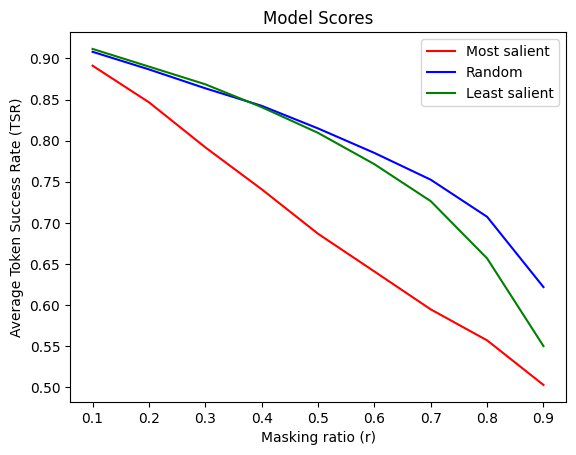

In [76]:
plt.cla()
 # , color='g') 
# .flip() reverses the order of the rows, so that, in the visualization, lower pitches appear lower on the y-axis
plt.plot(plot_x, plot_y_b[::-1], color='r')
plt.plot(plot_x, plot_y_r[::-1], color='b')
plt.plot(plot_x, plot_y_t[::-1], color='g')

#, color='r')
# plt.xlim(1.0, 0.0)
plt.title("Model Scores")
plt.xlabel("Masking ratio (r)")
plt.ylabel("Average Token Success Rate (TSR)")
plt.legend(["Most salient", "Random", "Least salient"])
plt.savefig("results.png", dpi=1000)